## Importation des bibliothèques

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd


## Chargement de la base de données IRIS
Ici c'est juste les données en brut. On peut regarder leur structure pour mieux les comprendre.

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Préparation des données

In [3]:
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)

y = iris.target  # Target labels (species)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Séparation des données pour l'entrainement et les tests

On va séparer en deux les données.

30% d'entre elles iront dans le jeu de test final (X_test), et 70% serviront à l'entrainement (X_train).
Les bonnes réponses sont stockées dans les y.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrainement du classifieur de l'arbre de décision
On entraine l'algorithme d'arbre de décision.
Un arbre de décision s'entraîne en découpant récursivement l'espace des données en  fonction des caractéristiques qui maximisent la séparation entre les classes.

- `DecisionTreeClassifier(random_state=42)` : Crée un modèle d'arbre de décision pour la classification. La valeur `random_state` est une seed permettant la répétabilité.
- `fit(X_train, y_train)` : Entraîne l'arbre de décision sur les données d'entraînement.

### Comment l'entraînement fonctionne-t-il ?

1. Choix du meilleur critère de séparation :
- L'algo teste chaque feature (X_train) pour diviser les données en sous-groupes.
- Il utilise une métrique comme l'entropie ou l'indice de Gini pour évaluer la "pureté" des groupes après la séparation.
2. Construction récursive de l'arbre :
- À chaque nœud, il choisit la feature qui sépare le mieux les classes.
- Il répète ce processus pour chaque sous-ensemble de données.
- Il s'arrête quand un critère d'arrêt est atteint (profondeur max, pureté max, etc.).
3. Création des feuilles finales :
- Chaque feuille contient une prédiction basée sur la majorité des échantillons qui y - arrivent.


In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Prédiction sur les données de test

Maintenant on test avec les données qu'on a mis de côté.

In [6]:
y_pred = clf.predict(X_test)

## Evaluation des performances du model

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy * 100:.2f}%")

Accuracy of the Decision Tree Classifier: 100.00%


Il semblerait que notre classifieur donne le résultat attendu à la perfection. 

## Visualisation de l'arbre de décision

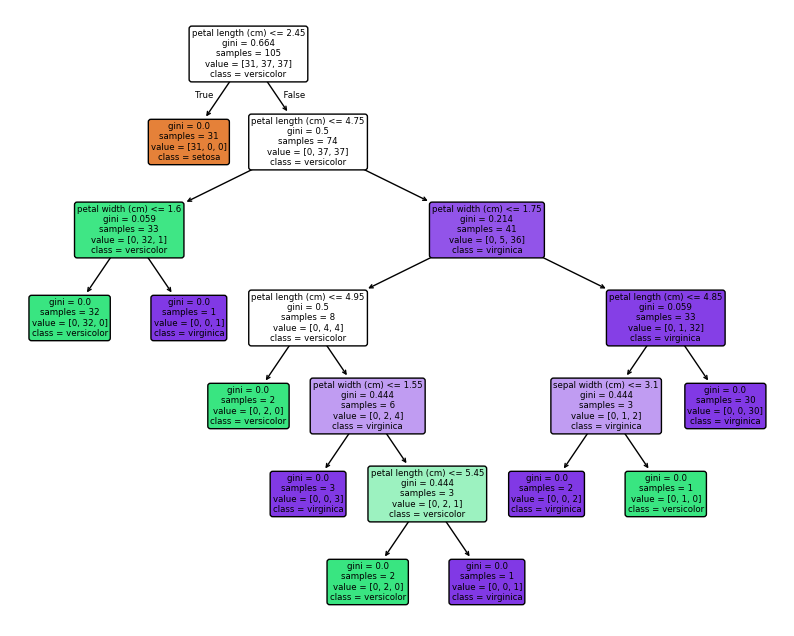

In [8]:
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

## Example de classification avec un nouvel échantillon

On définit un nouvel échantillon à la main, avec des features spécifiques :
- sepal length = 5.5
- sepal width = 2.4
- petal length = 3.8
- petal width = 1.1

In [9]:
new_sample = [[5.5, 2.4, 3.8, 1.1]] 

On mets la donnée dans notre moulinnette.

In [10]:
predicted_class = clf.predict(new_sample)

On affiche à quelle catégorie de fleur notre iris devrait être ajouté :

In [11]:


print(f"La classe prédit pour le nouvel échantillon est: {iris.target_names[predicted_class][0]}")



La classe prédit pour le nouvel échantillon est: versicolor


# Quels sont les paramètres que nous pouvons changer ?

Déjà, le fait que l'accuracy soit de 100% questionne. Est-ce qu'on ne fait pas de l'over-fitting ?

Nous pourrions jouer sur les éléments suivants pour lui essayer de le rendre plus générale :

- Profondeur de l'arbre : Un arbre profond peut mémoriser parfaitement les données d'entraînement mais généraliser moins bien. Diminuer la complexité du modèle → peut réduire l'overfitting. Mais à priori, mon arbre n'est pas si profond que ça, donc bon.